# Testing Order of Growth

[Click here to run this chapter on Colab](https://colab.research.google.com/github/AllenDowney/DSIRP/blob/main/chapters/timing.ipynb)

Analysis of algorithms makes it possible to predict how run time will grow as the size of a problem increases.
But this kind of analysis ignores leading coefficients and non-leading terms.
So the behavior for small and medium problems might not be what the analysis predicts.

To see how run time really behaves for a range of problem sizes, we can run the algorithm and measure.

To do the measurement, we'll use the [times](https://docs.python.org/3/library/os.html#os.times) function from the `os` module.

In [8]:
import os

def etime():
    """Measures user and system time this process has used.

    Returns the sum of user and system time."""
    user, sys, chuser, chsys, real = os.times()
    return user+sys

In [9]:
start = etime()
t = [x**2 for x in range(10000)]
end = etime()
end - start

0.010000000000000009

Exercise: Use `etime` to measure the computation time used by `sleep`.

In [10]:
from time import sleep

sleep(1)

In [11]:
# Solution

start = etime()
sleep(1)
end = etime()
end - start

0.010000000000000009

In [12]:
def time_func(func, n):
    """Run a function and return the elapsed time.

    func: function
    n: problem size, passed as an argument to func

    returns: user+sys time in seconds
    """
    start = etime()
    func(n)
    end = etime()
    elapsed = end - start
    return elapsed

One of the things that makes timing tricky is that many operations are too fast to measure accurately.

`%timeit` handles this by running enough times get a precise estimate, even for things that run very fast.

We'll handle it by running over a wide range of problem sizes, hoping to sizes that run long enough to measure, but not more than a few seconds.


The following function takes a size, `n`, creates an empty list, and calls `list.append` `n` times.

In [13]:
def list_append(n):
    t = []
    [t.append(x) for x in range(n)]

`timeit` can time this function accurately.

In [14]:
%timeit list_append(10000)

450 µs ± 751 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


But our `time_func` is not that smart.

In [15]:
time_func(list_append, 10000)

0.0

Exercise: Increase the number of iterations until the run time is measureable.

In [16]:
# Solution

time_func(list_append, 100000)

0.0

## List append

The following function gradually increases `n` and records the total time.

In [17]:
def run_timing_test(func, max_time=1):
    """Tests the given function with a range of values for n.

    func: function object

    returns: list of ns and a list of run times.
    """
    ns = []
    ts = []
    for i in range(10, 28):
        n = 2**i
        t = time_func(func, n)
        print(n, t)
        if t > 0:
            ns.append(n)
            ts.append(t)
        if t > max_time:
            break

    return ns, ts

In [18]:
ns, ts = run_timing_test(list_append)

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.0
131072 0.009999999999999787
262144 0.020000000000000462
524288 0.040000000000000924
1048576 0.0699999999999994
2097152 0.15000000000000036
4194304 0.2999999999999998
8388608 0.5700000000000003
16777216 1.0399999999999991


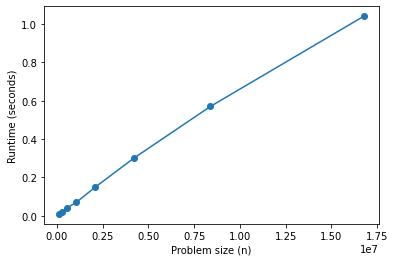

In [19]:
import matplotlib.pyplot as plt

plt.plot(ns, ts, 'o-')
plt.xlabel('Problem size (n)')
plt.ylabel('Runtime (seconds)');

This one looks pretty linear, but it won't always be so clear.
It will help to plot a straight line that goes through the last data point.

In [20]:
def fit(ns, ts, exp=1.0, index=-1):
    """Fits a curve with the given exponent.

    ns: sequence of problem sizes
    ts: sequence of times
    exp: exponent of the fitted curve
    index: index of the element the fitted line should go through

    returns: sequence of fitted times


    """
    # Use the element with the given index as a reference point,
    # and scale all other points accordingly.
    nref = ns[index]
    tref = ts[index]

    tfit = []
    for n in ns:
        ratio = n / nref
        t = ratio**exp * tref
        tfit.append(t)

    return tfit

In [21]:
ts_fit = fit(ns, ts)
ts_fit

[0.008124999999999993,
 0.016249999999999987,
 0.03249999999999997,
 0.06499999999999995,
 0.1299999999999999,
 0.2599999999999998,
 0.5199999999999996,
 1.0399999999999991]

The following function plots the actual results and the fitted line.

In [22]:
def plot_timing_test(ns, ts, label='', color='C0', exp=1.0, scale='log'):
    """Plots data and a fitted curve.

    ns: sequence of n (problem size)
    ts: sequence of t (run time)
    label: string label for the data curve
    color: string color for the data curve
    exp: exponent (slope) for the fitted curve
    scale: string passed to xscale and yscale
    """
    ts_fit = fit(ns, ts, exp)
    fit_label = 'exp = %d' % exp
    plt.plot(ns, ts_fit, label=fit_label, color='0.7', linestyle='dashed')
    plt.plot(ns, ts, 'o-', label=label, color=color, alpha=0.7)
    plt.xlabel('Problem size (n)')
    plt.ylabel('Runtime (seconds)')
    plt.xscale(scale)
    plt.yscale(scale)
    plt.legend()

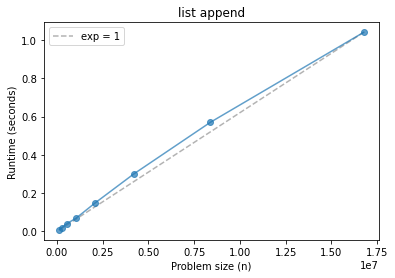

In [23]:
plot_timing_test(ns, ts, scale='linear')
plt.title('list append');

From these results, what can we conclude about the order of growth of `list.append`?

Before we go on, let's also look at the results on a log-log scale.

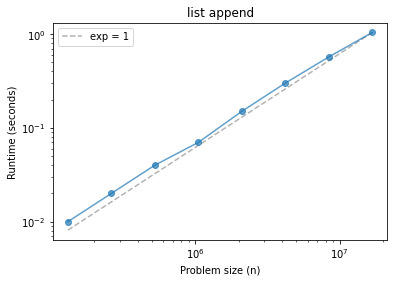

In [24]:
plot_timing_test(ns, ts, scale='log')
plt.title('list append');

Why might we prefer this scale?

## List pop

Now let's do the same for `list.pop` (which pops from the end of the list by default).

Notice that we have to make the list before we pop things from it, so we will have to think about how to interpret the results.

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.0
65536 0.009999999999999787
131072 0.019999999999999574
262144 0.030000000000001137
524288 0.05000000000000071
1048576 0.11999999999999922
2097152 0.2400000000000002
4194304 0.46999999999999886
8388608 0.9199999999999999
16777216 1.7600000000000016


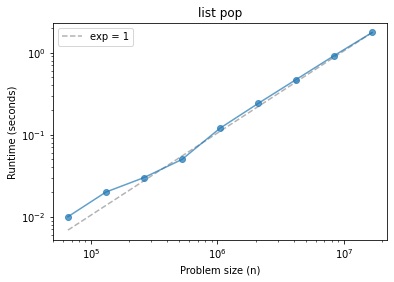

In [25]:
def list_pop(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop() for _ in range(n)]

ns, ts = run_timing_test(list_pop)
plot_timing_test(ns, ts, scale='log')
plt.title('list pop');

What can we conclude?

What about `pop(0)`, which pops from the beginning of the list?

Note: You might have to adjust `exp` to make the fitted line fit.

1024 0.0
2048 0.0
4096 0.0
8192 0.010000000000001563
16384 0.029999999999997584
32768 0.07000000000000028
65536 0.4200000000000017
131072 1.7799999999999976


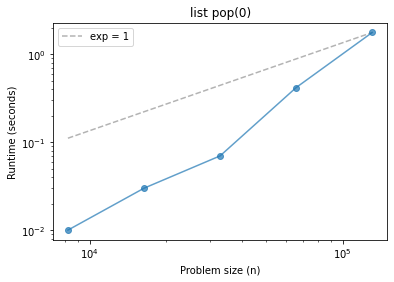

In [31]:
def list_pop0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.pop(0) for _ in range(n)]

ns, ts = run_timing_test(list_pop0)
plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list pop(0)');

## Searching a list

`list.index` searches a list and returns the index of the first element that matches the target.

What do we expect if we always search for the first element?

1024 0.0
2048 0.0
4096 0.0
8192 0.009999999999999787
16384 0.0
32768 0.009999999999999787
65536 0.009999999999999787
131072 0.030000000000001137
262144 0.049999999999998934
524288 0.08999999999999986
1048576 0.1999999999999993
2097152 0.40000000000000036
4194304 0.8000000000000007
8388608 1.5700000000000003


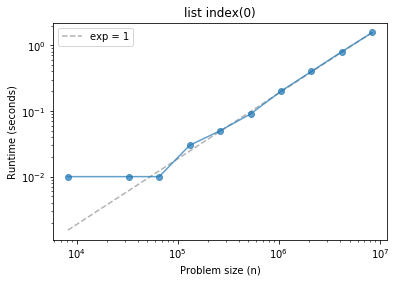

In [29]:
def list_index0(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(0) for _ in range(n)]

ns, ts = run_timing_test(list_index0)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(0)');

What if we always search for the last element?

1024 0.019999999999999574
2048 0.03999999999999915
4096 0.16000000000000014
8192 0.6099999999999994
16384 2.4300000000000033


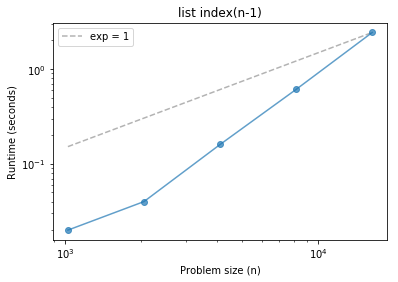

In [32]:
def list_index_n(n):
    t = []
    [t.append(x) for x in range(n)]
    [t.index(n-1) for _ in range(n)]

ns, ts = run_timing_test(list_index_n)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('list index(n-1)');

## Dictionary add

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.010000000000001563
65536 0.00999999999999801
131072 0.020000000000003126
262144 0.03999999999999915
524288 0.07000000000000028
1048576 0.14999999999999858
2097152 0.3000000000000007
4194304 0.5999999999999979
8388608 1.2300000000000004


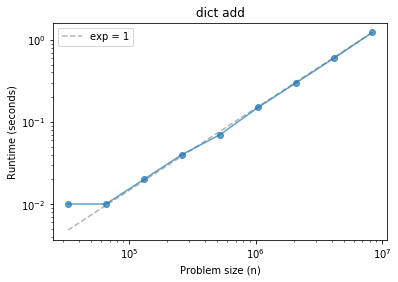

In [33]:
def dict_add(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]

ns, ts = run_timing_test(dict_add)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict add');

## Dictionary lookup 

1024 0.0
2048 0.0
4096 0.0
8192 0.0
16384 0.0
32768 0.00999999999999801
65536 0.010000000000001563
131072 0.030000000000001137
262144 0.05000000000000071
524288 0.09999999999999787
1048576 0.20000000000000284
2097152 0.399999999999995
4194304 0.8000000000000007
8388608 1.6499999999999986


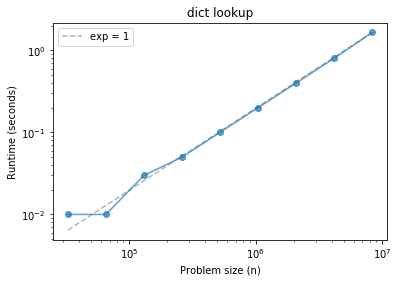

In [34]:
def dict_lookup(n):
    d = {}
    [d.setdefault(x, x) for x in range(n)]
    [d[x] for x in range(n)]

ns, ts = run_timing_test(dict_lookup)

plot_timing_test(ns, ts, scale='log', exp=1)
plt.title('dict lookup');

This characteristic of dictionaries is the foundation of a lot of efficient algorithms!

*Data Structures and Information Retrieval in Python*

Copyright 2021 Allen Downey

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)